# First Data Exploration


In [157]:
from platform import python_version


print(python_version())

3.10.4


In [158]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [159]:
df = pd.read_csv('../data/raw/10.17.2013_14.51.03_MDA_Sph_roid_1.csv', skiprows=8, sep=";")
df

Nr.        Frequenz                     14H                  14V  \
0    NaN             NaN     2013.10.17_14:51:03  2013.10.17_14:51:05   
1      1     5000,000000            66853,487266         63281,709397   
2      2     5740,768000            59471,248399         56173,679197   
3      3     6591,284000            52983,125771         49801,791036   
4      4     7567,806000            47126,193882         44231,604078   
..   ...             ... ..                  ...                  ...   
209   47  2877199,687000            -1821,669000         -1681,773000   
210   48  3303467,240000            -1710,928000         -1594,591000   
211   49  3792887,875000            -1616,320000         -1521,902000   
212   50  4354817,950000            -1546,342000         -1470,784000   
213   51  5000000,000000            -1513,208000         -1450,809000   

                    14UL                 14UR                 14LR  \
0    2013.10.17_14:51:06  2013.10.17_14:51:08  2013.10.17_14:51:09   
1           60597,558030         60337,605524         69374,743333   
2           53883,296259         53590,260087         61843,462478   
3           47795,669566         47533,551105         54910,898006   
4           42499,655670         42248,434555         48831,888310   
..                   ...                  ...                  ...   
209         -1586,256000         -1722,437000         -1595,203000   
210         -1509,258000         -1636,549000         -1505,523000   
211         -1444,939000         -1557,224000         -1430,622000   
212         -1398,653000         -1495,539000         -1376,350000   
213         -1381,853000         -1460,331000         -1350,528000   

                    14LL  Unnamed: 9  
0    2013.10.17_14:51:11         NaN  
1           69685,036491         NaN  
2           62051,049832         NaN  
3           55135,058035         NaN  
4           49088,648794         NaN  
..                   ...         ...  
209         -1528,798000         NaN  
210         -1438,706000         NaN  
211         -1360,744000         NaN  
212         -1302,827000         NaN  
213         -1273,361000         NaN  

[214 rows x 10 columns]

## 1 Plan of Action First Data Cleaning
Based on this first view on the data, we want to to the following things:
- Use Frequenz as index column
- delete first row and last column
- convert strings into flots
  - therefore we need to replace , with . (German decimal separator with English)
- check for na values and handle them accordingly
- extract betrag and phasenwinkel
- get relative values according to Leerwert
- further data exploration and descriptive statistics

### 1.1 First Data Cleaning

In [160]:
df = df.drop(df.columns[[-1,0]], axis=1) # delete Unamed: 9
df = df.drop(df.index[0], axis=0) # delete first row
df = df.replace(",",".", regex=True)
df.index = df.loc[:,"Frequenz"]
df = df.drop(df.columns[0], axis=1)
df.head()

14H           14V          14UL          14UR  \
Frequenz                                                                 
5000.000000     66853.487266  63281.709397  60597.558030  60337.605524   
5740.768000     59471.248399  56173.679197  53883.296259  53590.260087   
6591.284000     52983.125771  49801.791036  47795.669566  47533.551105   
7567.806000     47126.193882  44231.604078  42499.655670  42248.434555   
8689.004000     41887.183541  39175.528674  37694.315254  37476.411456   

                     14LR          14LL  
Frequenz                                 
5000.000000  69374.743333  69685.036491  
5740.768000  61843.462478  62051.049832  
6591.284000  54910.898006  55135.058035  
7567.806000  48831.888310  49088.648794  
8689.004000  43270.812560  43567.145790

### 1. 2 Handle NAs
Here we check the percentage of na's in each col. If the percentage is low, we just drop the na rows. Otherwise we drop whole noise columns

In [161]:
def get_na_dict(data):
    """Returns a dictionary with the number of NaN values per column
    Params:
        data: pandas dataframe
    Returns:
        dictionary with column names as keys and number of NaN values as values
    """
    na_dict = {}

    for col in data.columns:
        na_value = data[col].isna().mean()
        na_dict[col] = na_value
    # sort na_dict by value
    na_dict = {k: v for k, v in sorted(
        na_dict.items(), key=lambda item: item[1])}
    return na_dict


In [162]:
na_dict = get_na_dict(df)
print(na_dict)
print(df.shape)

{' ': 0.014084507042253521, '14H': 0.014084507042253521, '14V': 0.014084507042253521, '14UL': 0.014084507042253521, '14UR': 0.014084507042253521, '14LR': 0.014084507042253521, '14LL': 0.014084507042253521}
(213, 7)


In [163]:
df.dropna(axis=0, how="any", inplace=True)
df.replace(" ", np.nan, inplace=True)
na_dict = get_na_dict(df)
print(na_dict)

{'14H': 0.0, '14V': 0.0, '14UL': 0.0, '14UR': 0.0, '14LR': 0.0, '14LL': 0.0, ' ': 1.0}


In [164]:
df.dropna(axis=1, how='any', inplace=True)
na_dict = get_na_dict(df)
print(na_dict)
print(df.head())


{'14H': 0.0, '14V': 0.0, '14UL': 0.0, '14UR': 0.0, '14LR': 0.0, '14LL': 0.0}
                      14H           14V          14UL          14UR  \
Frequenz                                                              
5000.000000  66853.487266  63281.709397  60597.558030  60337.605524   
5740.768000  59471.248399  56173.679197  53883.296259  53590.260087   
6591.284000  52983.125771  49801.791036  47795.669566  47533.551105   
7567.806000  47126.193882  44231.604078  42499.655670  42248.434555   
8689.004000  41887.183541  39175.528674  37694.315254  37476.411456   

                     14LR          14LL  
Frequenz                                 
5000.000000  69374.743333  69685.036491  
5740.768000  61843.462478  62051.049832  
6591.284000  54910.898006  55135.058035  
7567.806000  48831.888310  49088.648794  
8689.004000  43270.812560  43567.145790  


### 1.3 Get Betrag and Phasenwinkel
These are two different values in the dataframe that describe Wechseltrom Impedance
The dataframe also consits of other information that we don't neeed, so we extract only those two. 

In [165]:
betrag = df.iloc[0:51,:].astype(float)
phasenwinkel = df.iloc[53:104,:].astype(float)
betrag.index = betrag.index.astype(float)
phasenwinkel.index = phasenwinkel.index.astype(float)

### 1.4 Get relative values
In order to get the value of the actual mesarument, we need to calculate the relative impedance. The relative impedance (extracted cell signal) was calculated as follows: (IZI with cells - IZI without cells) / ZI without cells × 100%.

Additionally, the data cleaning steps has benn refactored into a extra function, so we can perform the data cleaning on all csv files

In [171]:
# first read in leerwert
df_leer = pd.read_csv('../data/raw/10.17.2013_14.50.26_MDA_Leewert.csv', sep=';', skiprows=8)
df_leer.head()

Nr.     Frequenz                     14H                  14V  \
0  NaN          NaN     2013.10.17_14:50:26  2013.10.17_14:50:28   
1    1  5000,000000            66119,540070         63330,005373   
2    2  5740,768000            58913,708172         56019,745643   
3    3  6591,284000            52511,114472         49748,082766   
4    4  7567,806000            46650,584088         44112,946310   

                  14UL                 14UR                 14LR  \
0  2013.10.17_14:50:29  2013.10.17_14:50:31  2013.10.17_14:50:33   
1         60420,912861         60159,927512         69091,778754   
2         53711,309131         53361,944652         61315,341753   
3         47702,468270         47372,807806         54562,206176   
4         42277,752223         42097,093364         48318,208827   

                  14LL  Unnamed: 9  
0  2013.10.17_14:50:34         NaN  
1         69305,461822         NaN  
2         61686,726711         NaN  
3         54738,787206         NaN  
4         48668,500505         NaN

In [174]:
#### CONSTANTS ####
LEERWERT_START_INDEX = 0
LEERWERT_STOP_INDEX = 51
PHASENWINKEL_START_INDEX = 53
PHASENWINKEL_STOP_INDEX = 104
LAST_COL_EMPTY = True
DELETE_FIRST_ROW = True
SKIPROWS = 8
INDEX_COL = "Frequenz"



def clean_data(data):
    """Cleans data and gets betrag and phasenwinkel
    Params:
        data: pandas dataframe
    Returns:
        betrag: pandas dataframe
        phasenwinkel: pandas dataframe

    """
    # removes last column if the column is empty
    if LAST_COL_EMPTY:
        data = data.drop(data.columns[[-1, 0]], axis=1)
    # first row is usually filled with timestamp data that we don't need
    if DELETE_FIRST_ROW:
        data = data.drop(data.index[0], axis=0)
    data = data.replace(",", ".", regex=True)  # transforming to EN decimals
    data.index = data.loc[:,INDEX_COL]  # making frequency index column
    na_dict = get_na_dict(data)
    print(f"na values per column: {na_dict}")
    # drop frequency column (is index now)
    data = data.drop(data.columns[0], axis=1)
    # remove all na rows, we don't use a lot of data here, because portion of NA
    # rows < 5%
    data = data.dropna(axis=0, how="any")
    data.replace(" ", np.nan, inplace=True)  # for empty column in between
    data = data.dropna(axis=1, how="any")
    betrag = data.iloc[LEERWERT_START_INDEX:LEERWERT_STOP_INDEX, :].astype(
        float
    )  # betrag
    phasenwinkel = data.iloc[
        PHASENWINKEL_START_INDEX:PHASENWINKEL_STOP_INDEX, :
    ].astype(
        float
    )  # Phase
    return betrag, phasenwinkel

In [175]:
betrag_leer, phasenwinkel_leer = clean_data(df_leer)

na values per column: {' ': 0.014084507042253521, '14H': 0.014084507042253521, '14V': 0.014084507042253521, '14UL': 0.014084507042253521, '14UR': 0.014084507042253521, '14LR': 0.014084507042253521, '14LL': 0.014084507042253521, 'Frequenz': 0.028169014084507043}


In [177]:
phasenwinkel_leer.head()

14H        14V       14UL       14UR       14LR       14LL
Frequenz                                                                     
5000.000000 -72.177740 -75.437565 -73.670288 -74.287983 -74.582284 -74.200600
5740.768000 -72.347306 -75.494141 -73.819469 -74.346198 -74.691936 -74.242668
6591.284000 -72.546760 -75.479044 -73.882264 -74.392198 -74.752975 -74.367335
7567.806000 -72.588838 -75.204077 -73.883524 -74.304103 -74.615578 -74.345032
8689.004000 -72.461604 -74.916267 -73.892805 -74.132319 -74.511126 -74.216565

In [210]:

betrag2 = betrag.reset_index()
betrag2_leer = betrag_leer.reset_index()


In [215]:
betrag2 = betrag2.drop(betrag2.columns[0], axis=1)
betrag2_leer = betrag2_leer.drop(betrag2_leer.columns[0], axis=1)

In [219]:
betrag_rel = ((betrag2 - betrag2_leer) / betrag2_leer) * 100
betrag_rel.index = betrag.index
betrag_rel.head()

14H       14V      14UL      14UR      14LR      14LL
Frequenz                                                            
5000.000  1.110031 -0.076261  0.292358  0.295343  0.409549  0.547684
5740.768  0.946368  0.274784  0.320207  0.427862  0.861319  0.590602
6591.284  0.898879  0.107960  0.195380  0.339316  0.639072  0.723931
7567.806  1.019515  0.268986  0.524870  0.359505  1.063118  0.863286
8689.004  1.019979  0.643297  0.719575  0.505894  0.738611  1.021721

In [221]:
phasenwinkel2 = phasenwinkel.reset_index()
phasenwinkel2_leer = phasenwinkel_leer.reset_index()

In [223]:
phasenwinkel2_leer = phasenwinkel2_leer.drop('Frequenz', axis=1)

In [222]:
phasenwinkel2 = phasenwinkel2.drop('Frequenz', axis=1)

For the Phasenwinkel we just use the difference on adice of Domain expert Dr Jahnke

In [224]:

phasenwinkel_rel = phasenwinkel2 - phasenwinkel2_leer
phasenwinkel_rel.head()

14H       14V      14UL      14UR      14LR      14LL
0  0.857468  0.863303  0.906848  0.780114  0.693886  0.880833
1  1.066251  0.963455  1.042852  0.898852  0.824909  0.932130
2  1.291875  1.265134  1.278678  1.039620  1.123835  1.142495
3  1.437244  1.352833  1.275838  1.034756  1.120858  1.305818
4  1.646443  1.512035  1.638654  1.226871  1.299452  1.337098

In [225]:
phasenwinkel_rel.index = phasenwinkel.index

## 2. Furter Data Exploration and Plots
I assume it could make sense to combine the different measurement points (14V, 14H, 14UL, ...) to one single metric. Therefore I plot the points over frequency

In [228]:
import matplotlib.pyplot as plt
def plot_measurements(data_rel):
    fig, ax = plt.subplots(tight_layout=True)
    for col in data_rel.columns:
        ax.plot(data_rel[col].astype(float), label=col)
        ax.set_ylim(float(data_rel.min().min()), float(data_rel.max().max()))
    ax.scatter(data_rel.index,data_rel.mean(axis=1), label='mean', ) 
    ax.set_xlabel('log freq')
    ax.set_ylabel('betrag')
    ax.legend()
    ax.set_xscale('log')
    plt.show()

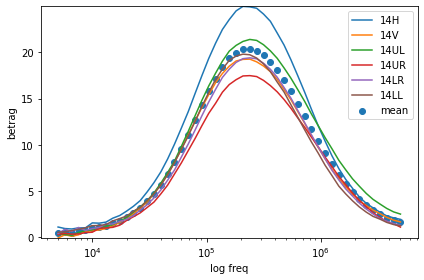

In [229]:
plot_measurements(betrag_rel)


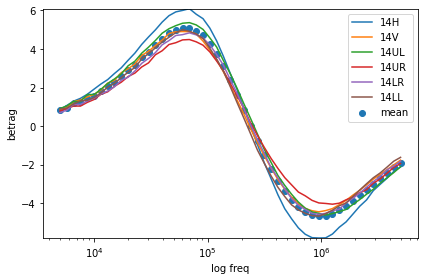

In [230]:
plot_measurements(phasenwinkel_rel)

The plots suggest little added information, when keeping all measurements. Thus, we'll just keep the mean.


In [231]:
betrag_rel_mean = betrag_rel.mean(axis=1)
phasenwinkel_rel_mean = phasenwinkel_rel.mean(axis=1)

### 2.1 Explore relation between betrag & phase


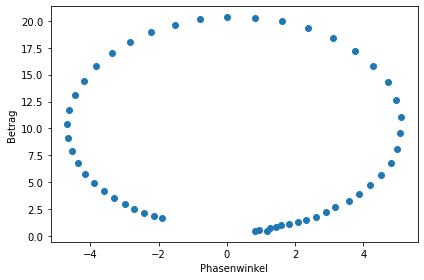

In [236]:
fig, ax = plt.subplots(tight_layout=True)
ax.scatter(phasenwinkel_rel_mean, betrag_rel_mean)
ax.set_ylabel('Betrag')
ax.set_xlabel('Phasenwinkel')
plt.show()

In [233]:
betrag_rel_mean

Frequenz
5000.000        0.429784
5740.768        0.570190
6591.284        0.484090
7567.806        0.683213
8689.004        0.774846
9976.312        0.966648
11454.338       1.103459
13151.340       1.269821
15099.759       1.495018
17336.843       1.787653
19905.359       2.179696
22854.409       2.668792
26240.373       3.205429
30127.979       3.890866
34591.549       4.698502
39716.412       5.669306
45600.542       6.808270
52356.427       8.098587
60113.222       9.561721
69019.213      11.077423
79244.660      12.664609
90985.043      14.277796
104464.807     15.800553
119941.646     17.162750
137711.435     18.396994
158113.883     19.333713
181539.027     19.973099
208434.692     20.321659
239315.046     20.362806
274770.437     20.178416
315478.672     19.666150
362217.980     18.983999
415881.886     18.053595
477496.293     16.976940
548239.098     15.767722
629462.706     14.441456
722719.885     13.116698
829793.454     11.722267
952730.359     10.397952
1093880.812     

In [234]:
phasenwinkel_rel_mean

Frequenz
5000.000       0.830409
5740.768       0.954742
6591.284       1.190273
7567.806       1.254558
8689.004       1.443425
9976.312       1.580466
11454.338      1.827626
13151.340      2.076237
15099.759      2.311325
17336.843      2.613361
19905.359      2.902691
22854.409      3.171538
26240.373      3.582730
30127.979      3.860145
34591.549      4.194984
39716.412      4.529024
45600.542      4.810857
52356.427      4.985682
60113.222      5.078732
69019.213      5.101988
79244.660      4.954297
90985.043      4.719641
104464.807     4.284188
119941.646     3.755623
137711.435     3.113661
158113.883     2.370986
181539.027     1.614191
208434.692     0.819150
239315.046    -0.004648
274770.437    -0.786284
315478.672    -1.525161
362217.980    -2.211043
415881.886    -2.835160
477496.293    -3.376776
548239.098    -3.828151
629462.706    -4.196009
722719.885    -4.441050
829793.454    -4.615076
952730.359    -4.677092
1093880.812   -4.654641
1255943.216   -4.544359
1442015

## 3 Next Steps
Now we have a first overview of the data and functions to clean the csv. Subsequently we'll extract these function into a python script and combine the data of each tumor cell line and spheroid to one big data file